In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

sns.set(font_scale=1, rc={'figure.figsize':(8,6)})


In [319]:
# filename = 'archive/summer-products-with-rating-and-performance_2020-08.csv'
filename = 'archive/summer-products-with-rating-and-performance_2020-08.csv'
# filename = 'project-data.csv'
sales_df = pd.read_csv(filename)
sales_df.shape

(1573, 43)

## Data Description

[Original Source](https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish)

The data comes from the Wish platform. This dataset contains product listings as well as products ratings and sales performance. The columns are described as follows:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|title                          |character | Title for localized for european countries. May be the same as title_orig if the seller did not offer a translation. |
|title_orig                     |character | Original english title of the product. |
|price                          |double    | Price you would pay to get the product. |
|retail_price                   |double    | Reference price for similar articles on the market, or in other stores/places. Used by the seller to indicate a regular value or the price before discount. |
|currency_buyer                 |character | Currency of the prices. |
|units_sold                     |double    | Number of units sold. Lower bound approximation by steps. |
|uses_ad_boosts                 |double    | Whether the seller paid to boost his product within the platform (highlighting, better placement). |
|rating                         |double    | Mean product rating. |
|rating_count                   |double    | Total number of ratings of the product. |
|rating_five_count              |double    | Number of 5-star ratings. |
|rating_four_count              |double    | Number of 4-star ratings. |
|rating_three_count             |double    | Number of 3-star ratings. |
|rating_two_count               |double    | Number of 2-star ratings. |
|rating_one_count               |double    | Number of 1-star ratings. |
|badges_count                   |double    | Number of badges the product or the seller have. |
|badge_local_product            |double | A badge that denotes the product is a local product. Conditions may vary (being produced locally, or something else). Some people may prefer buying local products rather than. 1 means Yes, has the badge. |
|badge_product_quality          |double    | Badge awarded when many buyers consistently gave good evaluations 1 means Yes, has the badge. |
|badge_fast_shipping            |double    | Badge awarded when this product's order is consistently shipped rapidly. |
|tags                           |character    | Tags set by the seller. |
|product_color                  |character | Product's main color. |
|product_variation_size_id      |character | One of the available size variation for this product. |
|product_variation_inventory    |double    | Inventory the seller has. Max allowed quantity is 50. |
|shipping_option_name           |character | Options for the type of shipping. |
|shipping_option_price          |double    | Shipping price. |
|shipping_is_express            |double    | Whether the shipping is express or not. 1 for True. |
|countries_shipped_to           |double    | Number of countries this product is shipped to. Sellers may choose to limit where they ship a product to. |
|inventory_total                |double    | Total inventory for all the product's variations (size/color variations for instance). |
|has_urgency_banner             |double    | Whether there was an urgency banner with an urgency. |
|urgency_text                   |character    | A text banner that appear over some products in the search results. |
|origin_country                 |character    | Country of origin from where the product was imported. |
|merchant_title                 |character | Merchant's displayed name (show in the UI as the seller's shop name). |
|merchant_name                  |character    | Merchant's canonical name. A name not shown publicly. Used by the website under the hood as a canonical name. Easier to process since all lowercase without white space. |
|merchant_info_subtitle         |character    | The subtitle text as shown on a seller's info section to the user. (raw, not preprocessed). The website shows this to the user to give an overview of the seller's stats to the user. Mostly consists of '% <positive_feedbacks> (<rating_count> reviews)' written in french. |
|merchant_rating_count          |double    | Number of ratings of this seller. |
|merchant_rating                |double    | Merchant's rating. |
|merchant_id                    |character | Merchant unique id|
|merchant_has_profile_picture   |double    | Convenience boolean that says whether there is a 'merchant_profile_picture' url. |
|merchant_profile_picture       |character | Custom profile picture of the seller (if the seller has one). Empty otherwise. |
|product_url                    |character | URL to the product page. You may need to login to access it |
|product_picture                |character    | Pictures of the products. |
|product_id                     |character    | Product identifier. You can use this key to remove duplicate entries if you're not interested in studying them. |
|theme                          |character | The search term used in the search bar of the website to get these search results. |
|crawl_month                    |character    | Month this information was obtained from the Wish website. |



In [320]:
missing_val = sales_df.isna().sum()
missing_val[missing_val > 0]


rating_five_count              45
rating_four_count              45
rating_three_count             45
rating_two_count               45
rating_one_count               45
product_color                  41
product_variation_size_id      14
has_urgency_banner           1100
urgency_text                 1100
origin_country                 17
merchant_name                   4
merchant_info_subtitle          1
merchant_profile_picture     1347
dtype: int64

## Correlation With Target Variable

<AxesSubplot:>

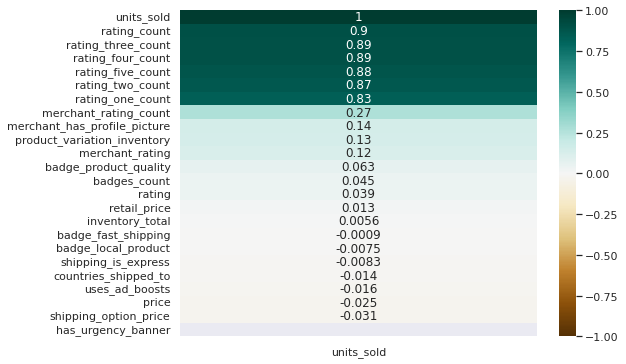

In [321]:
corr_vals = sales_df.corr()['units_sold'].sort_values(ascending=False).to_frame()
sns.heatmap(corr_vals, annot=True,vmin=-1, vmax=1, cmap='BrBG')

## Origin Country

<AxesSubplot:xlabel='origin_country', ylabel='count'>

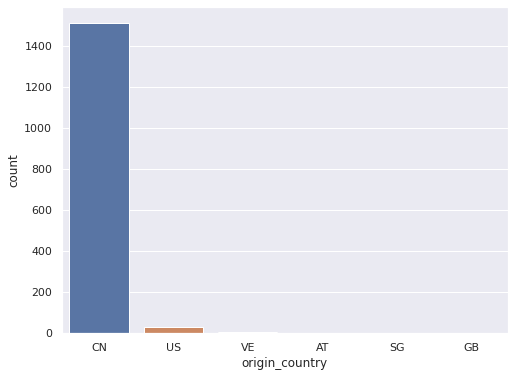

In [322]:
sns.countplot(x=sales_df['origin_country'])

China and US are most popular origin country we will replace other countries with "other"

<AxesSubplot:xlabel='origin_country', ylabel='count'>

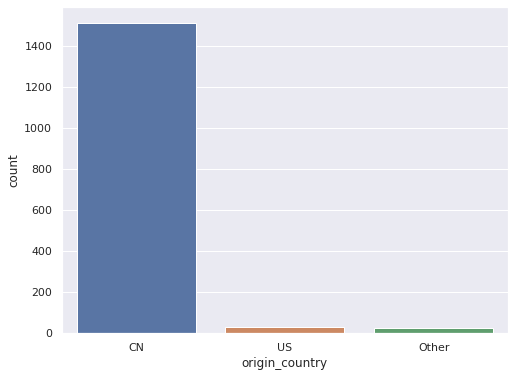

In [323]:
def changeCountry(x):
    if x in ["CN","US"]:
        return x
    return "Other"

sales_df['origin_country'] = sales_df['origin_country'].map(lambda x: changeCountry(x))
sns.countplot(x=sales_df['origin_country'])

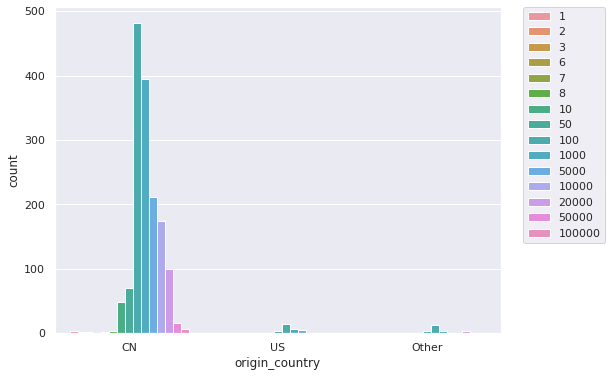

In [324]:
sns.countplot(x=sales_df['origin_country'],hue=sales_df['units_sold'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='origin_country', ylabel='units_sold'>

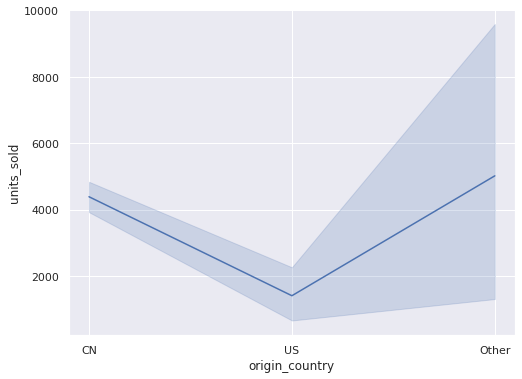

In [325]:
sns.lineplot(x=sales_df['origin_country'], y=sales_df['units_sold'])

<AxesSubplot:xlabel='origin_country', ylabel='units_sold'>

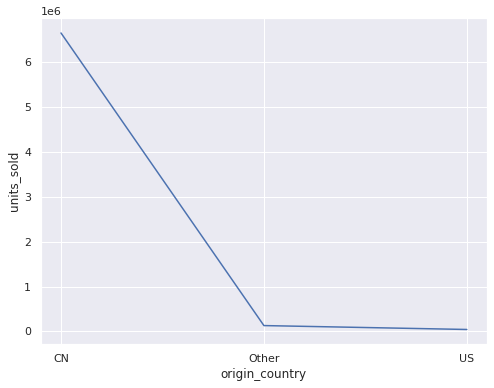

In [326]:
col_df = sales_df.groupby('origin_country').agg('sum', numeric_only = True)['units_sold'].to_frame()
col_df.reset_index(level=0, inplace=True)

sns.lineplot(x="origin_country", y="units_sold",
             data=col_df)

## Size Analysis

In [327]:
unique_sizes = sales_df['product_variation_size_id'].unique()
len(unique_sizes)

107

In [328]:
prod_size_counts = sales_df['product_variation_size_id'].value_counts()
prod_size_counts[prod_size_counts > 1]

S               641
XS              356
M               200
XXS             100
L                49
S.               18
XL               17
XXL              15
XXXS              6
s                 5
Size S            5
XS.               5
4XL               5
2XL               4
SIZE XS           4
M.                4
Size-XS           4
Size-S            3
2pcs              3
SizeL             3
10 ml             3
33                3
34                3
size S            2
XXXXL             2
Size M            2
Size -XXS         2
35                2
S(bust 88cm)      2
25                2
1 pc.             2
S Pink            2
Size4XL           2
5XL               2
SIZE-XXS          2
Suit-S            2
One Size          2
Size S.           2
3XL               2
EU 35             2
29                2
XXXXXL            2
1                 2
Name: product_variation_size_id, dtype: int64

In [329]:
# We will reduce the sizes from 107 to 7 categories
sizes_dic = {
    "XXS": ["Size -XXS","SIZE-XXS","XXXS"],
    "XS": ["XS.","Size-XS","SIZE XS"],
    "S": ["S.","Size S","Size-S","size S","Size S.","s","S(bust 88cm)","S Pink",],
    "M": ["M.","Size M"],
    "L": ["SizeL",],
    "XL": ["XXL","Size4XL","5XL","4XL","3XL","2XL","XXXXXL"]
}
color_key_val = {}
for k,v in sizes_dic.items():
    for tv in v:
        color_key_val[tv] = k
print(color_key_val)

{'Size -XXS': 'XXS', 'SIZE-XXS': 'XXS', 'XXXS': 'XXS', 'XS.': 'XS', 'Size-XS': 'XS', 'SIZE XS': 'XS', 'S.': 'S', 'Size S': 'S', 'Size-S': 'S', 'size S': 'S', 'Size S.': 'S', 's': 'S', 'S(bust 88cm)': 'S', 'S Pink': 'S', 'M.': 'M', 'Size M': 'M', 'SizeL': 'L', 'XXL': 'XL', 'Size4XL': 'XL', '5XL': 'XL', '4XL': 'XL', '3XL': 'XL', '2XL': 'XL', 'XXXXXL': 'XL'}


In [330]:
# Replace redundent sizes
def changeSize(x):
    if x in color_key_val.keys():
        return color_key_val[x]
    elif x in sizes_dic.keys():
        return x
    return "Other"
    
sales_df['product_variation_size_id'] = sales_df['product_variation_size_id'].map(lambda x : changeSize(x))

<AxesSubplot:xlabel='product_variation_size_id', ylabel='count'>

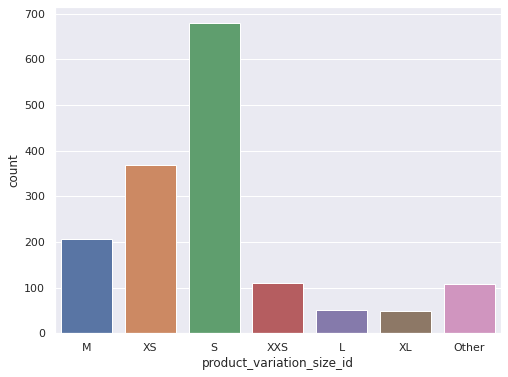

In [331]:
sns.countplot(x=sales_df['product_variation_size_id'])

<AxesSubplot:xlabel='product_variation_size_id', ylabel='units_sold'>

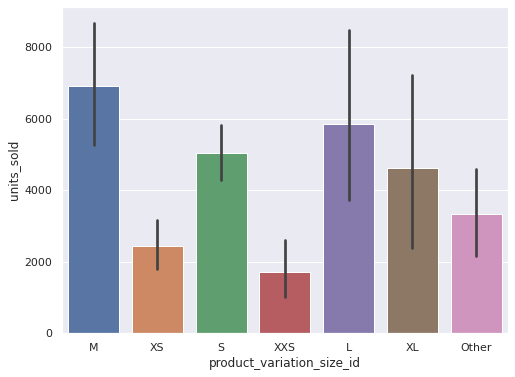

In [332]:
sns.barplot(x="product_variation_size_id", y="units_sold", data=sales_df)

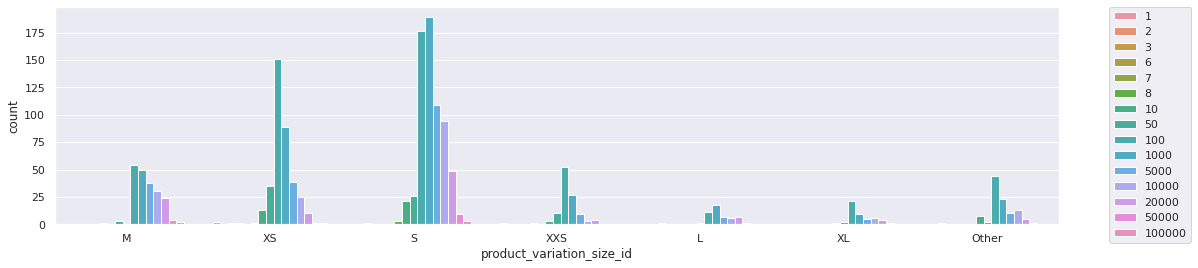

In [333]:
plt.figure(figsize=(18,4))
sns.countplot(x=sales_df['product_variation_size_id'],hue=sales_df['units_sold'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Color Analysis

In [334]:
unique_colors = sales_df['product_color'].unique()
print(unique_colors)

['white' 'green' 'leopardprint' 'black' 'yellow' 'navyblue' 'blue' 'beige'
 'grey' 'lightblue' 'orange' 'red' 'Black' 'armygreen' nan 'pink' 'khaki'
 'red & blue' 'blue & pink' 'RED' 'white & green' 'winered'
 'black & green' 'purple' 'whitefloral' 'floral' 'fluorescentgreen'
 'orange & camouflage' 'lightyellow' 'coolblack' 'multicolor' 'camouflage'
 'lightpink' 'pink & black' 'silver' 'Army green' 'lightgreen' 'mintgreen'
 'pink & grey' 'gray' 'coffee' 'rose' 'light green' 'leopard'
 'black & white' 'orange-red' 'dustypink' 'White' 'star' 'white & black'
 'apricot' 'skyblue' 'burgundy' 'claret' 'pink & white' 'rosered' 'tan'
 'navy blue' 'wine red' 'lightred' 'Pink' 'coralred' 'brown' 'lakeblue'
 'darkblue' 'camel' 'pink & blue' 'nude' 'Blue' 'lightpurple' 'army'
 'black & stripe' 'Rose red' 'greysnakeskinprint' 'denimblue' 'applegreen'
 'offwhite' 'lightgray' 'navy' 'gray & white' 'brown & yellow'
 'winered & yellow' 'army green' 'whitestripe' 'rainbow' 'lightgrey'
 'watermelonred' '

In [335]:
prod_color_counts = sales_df['product_color'].value_counts()
print(prod_color_counts[prod_color_counts > 2])

black               302
white               254
yellow              105
blue                 99
pink                 99
red                  93
green                90
grey                 71
purple               53
armygreen            31
navyblue             28
winered              28
orange               27
multicolor           20
beige                14
lightblue            12
khaki                12
gray                 11
white & green        10
rosered               8
skyblue               8
brown                 7
coffee                7
darkblue              6
floral                5
rose                  5
lightpink             4
navy                  4
leopard               4
black & green         4
fluorescentgreen      4
lightgreen            3
White                 3
orange-red            3
black & white         3
camouflage            3
Black                 3
Name: product_color, dtype: int64


In [336]:
colors_dic = {
    "black": ["Black","coolblack"],
    "white": ["White","whitefloral","silver","offwhite",'army green', 'whitestripe'],
    "yellow": ['lightyellow'],
    "blue": ["navyblue","lightblue","skyblue","darkblue","navyblue","navy","navy blue","lakeblue","denimblue",'prussianblue'],
    "pink": ["lightpink","dustypink","Pink"],
    "red": ["winered","resered","rose","RED","claret","rosered","wine red","lightred","coralred","Rose red"],
    "green": ["lightgreen","armygreen","fluorescentgreen","Army green","mintgreen","light green","applegreen","darkgreen"],
    "grey": ["gray","lightgray",'lightgrey'],
    "brown": ["coffee","beige","khaki","tan","camel","nude"],
    "orange": ["apricot","orange-red"],
    "purple": ["burgundy","lightpurple","violet"],
    "dual": ["white & green","black & green","black & white","red & blue","blue & pink","orange & camouflage","pink & black","pink & grey","white & black","pink & white","pink & blue","black & stripe","gray & white","brown & yellow","winered & yellow","navyblue & white","white & red","black & yellow","black & blue"],
}

color_key_val = {}
for k,v in colors_dic.items():
    for tv in v:
        color_key_val[tv] = k
print(color_key_val)

{'Black': 'black', 'coolblack': 'black', 'White': 'white', 'whitefloral': 'white', 'silver': 'white', 'offwhite': 'white', 'army green': 'white', 'whitestripe': 'white', 'lightyellow': 'yellow', 'navyblue': 'blue', 'lightblue': 'blue', 'skyblue': 'blue', 'darkblue': 'blue', 'navy': 'blue', 'navy blue': 'blue', 'lakeblue': 'blue', 'denimblue': 'blue', 'prussianblue': 'blue', 'lightpink': 'pink', 'dustypink': 'pink', 'Pink': 'pink', 'winered': 'red', 'resered': 'red', 'rose': 'red', 'RED': 'red', 'claret': 'red', 'rosered': 'red', 'wine red': 'red', 'lightred': 'red', 'coralred': 'red', 'Rose red': 'red', 'lightgreen': 'green', 'armygreen': 'green', 'fluorescentgreen': 'green', 'Army green': 'green', 'mintgreen': 'green', 'light green': 'green', 'applegreen': 'green', 'darkgreen': 'green', 'gray': 'grey', 'lightgray': 'grey', 'lightgrey': 'grey', 'coffee': 'brown', 'beige': 'brown', 'khaki': 'brown', 'tan': 'brown', 'camel': 'brown', 'nude': 'brown', 'apricot': 'orange', 'orange-red': 'o

In [337]:
def changeColor(x):
    if x in color_key_val.keys():
        return color_key_val[x]
    elif x in colors_dic.keys():
        return x
    return "other"
    
sales_df['product_color'] = sales_df['product_color'].map(lambda x : changeColor(x))


In [338]:
sales_df['product_color'].unique()

array(['white', 'green', 'other', 'black', 'yellow', 'blue', 'brown',
       'grey', 'orange', 'red', 'pink', 'dual', 'purple'], dtype=object)

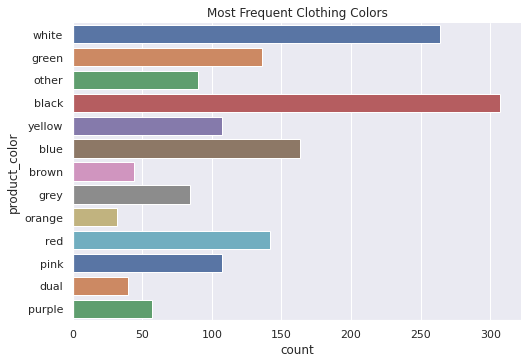

In [339]:
sns.catplot(y = 'product_color',data=sales_df, aspect=1.5,
            height = 5,kind="count", palette = "deep").set(title = "Most Frequent Clothing Colors")


<AxesSubplot:xlabel='product_color', ylabel='units_sold'>

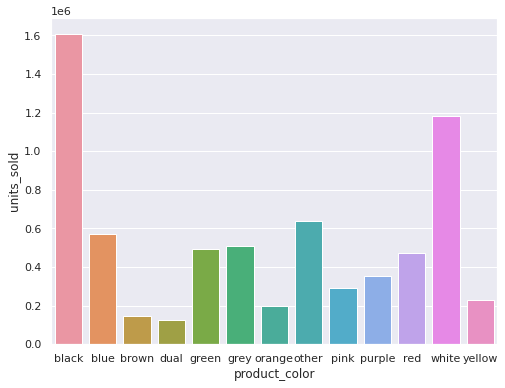

In [340]:
col_df = sales_df.groupby('product_color').agg('sum', numeric_only = True)['units_sold'].to_frame()
col_df.reset_index(level=0, inplace=True)
sns.barplot(x="product_color", y="units_sold", data=col_df)

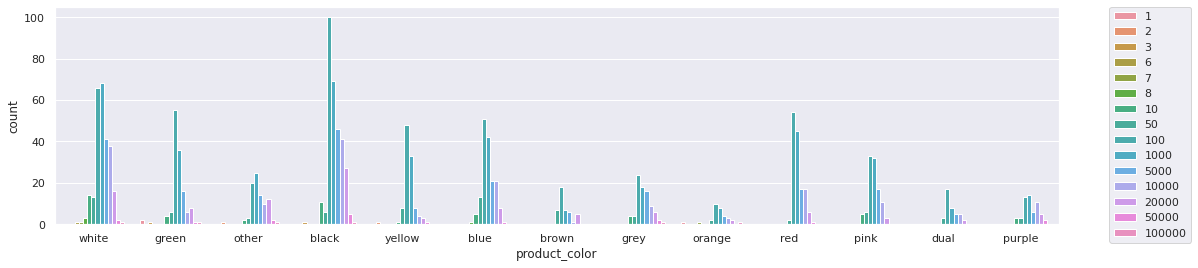

In [341]:
plt.figure(figsize=(18,4))
sns.countplot(x=sales_df['product_color'],hue=sales_df['units_sold'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Rating Analysis

<AxesSubplot:xlabel='rating', ylabel='Count'>

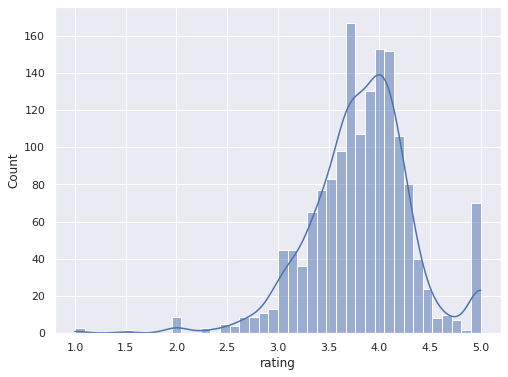

In [342]:
# sns.countplot(sales_df['rating'])
sns.histplot(sales_df['rating'],kde=True)

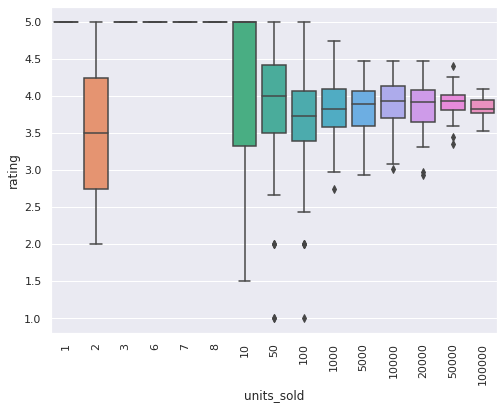

In [343]:
sns.boxplot(x=sales_df['units_sold'],y=sales_df['rating'])
plt.xticks(rotation=90, ha='center')
None


<AxesSubplot:xlabel='rating_count', ylabel='Count'>

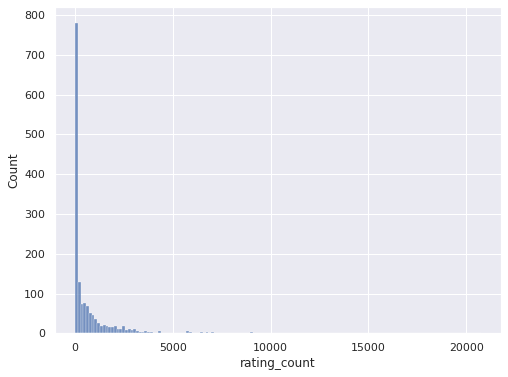

In [344]:
sns.histplot(sales_df['rating_count'])

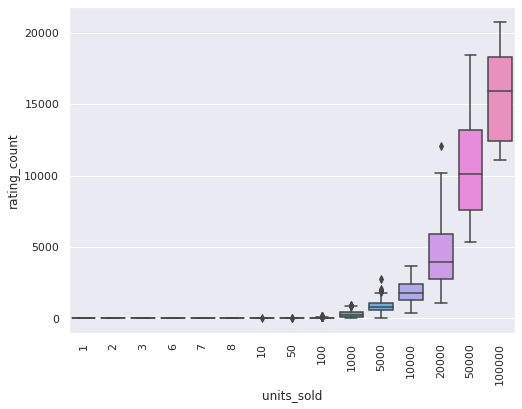

In [345]:
sns.boxplot(x=sales_df['units_sold'],y=sales_df['rating_count'])
plt.xticks(rotation=90, ha='center')
None


## Units Sold

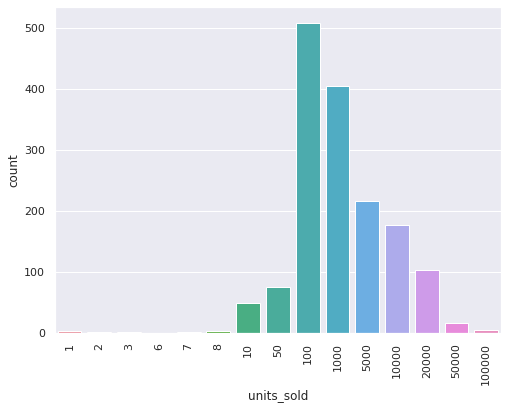

In [346]:
sns.countplot(x=sales_df['units_sold'])
plt.xticks(rotation=90, ha='center')
None

## Price Analysis

<AxesSubplot:xlabel='price', ylabel='Count'>

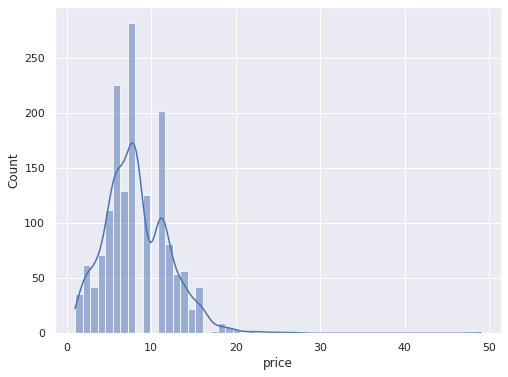

In [347]:
sns.histplot(x=sales_df['price'],kde=True)

<AxesSubplot:xlabel='units_sold', ylabel='price'>

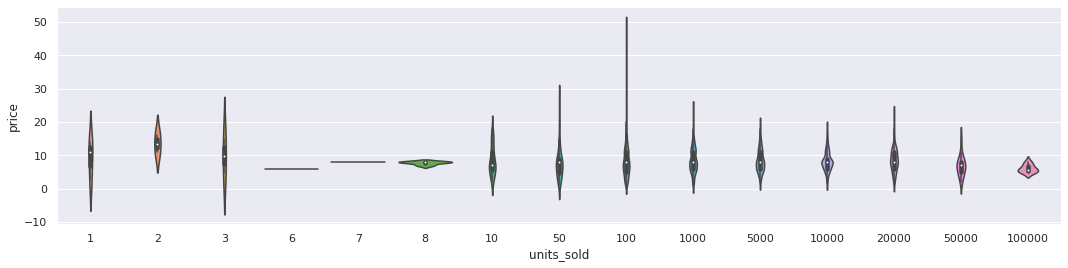

In [348]:
plt.figure(figsize=(18,4))
sns.violinplot(x=sales_df['units_sold'], y=sales_df['price'])

<AxesSubplot:xlabel='retail_price', ylabel='Count'>

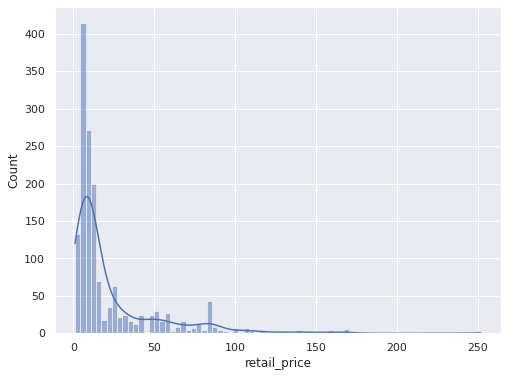

In [349]:
sns.histplot(x=sales_df['retail_price'],kde=True)

Retail Price is right skewed

<AxesSubplot:xlabel='units_sold', ylabel='retail_price'>

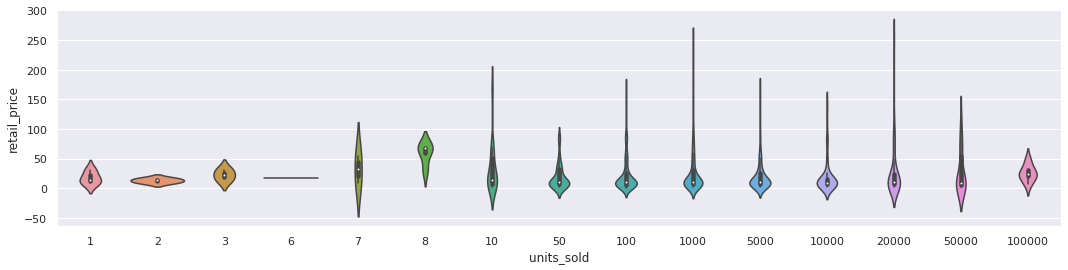

In [350]:
plt.figure(figsize=(18,4))
sns.violinplot(x=sales_df['units_sold'], y=sales_df['retail_price'])

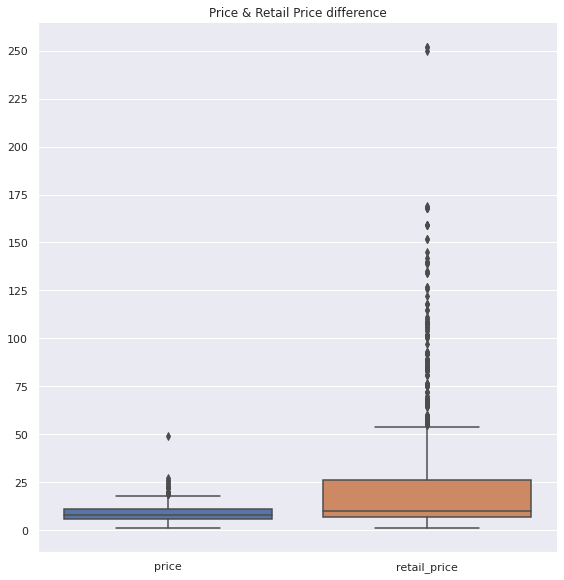

In [351]:
sns.catplot(data=sales_df[["price","retail_price"]], aspect=1, height = 8,
            kind="box", palette="deep").set(title = "Price & Retail Price difference",yticks =np.arange(0,sales_df["retail_price"].max(),25))

<AxesSubplot:xlabel='uses_ad_boosts', ylabel='count'>

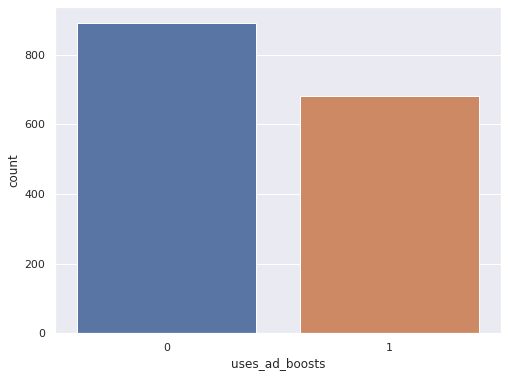

In [352]:
sns.countplot(x=sales_df['uses_ad_boosts'])

<AxesSubplot:xlabel='price', ylabel='Count'>

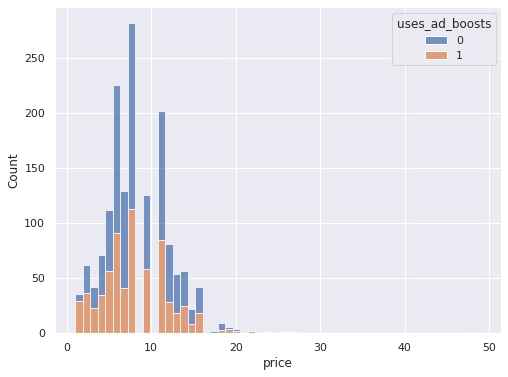

In [353]:
sns.histplot(x=sales_df['price'],hue=sales_df['uses_ad_boosts'],multiple='stack')

<AxesSubplot:xlabel='units_sold', ylabel='price'>

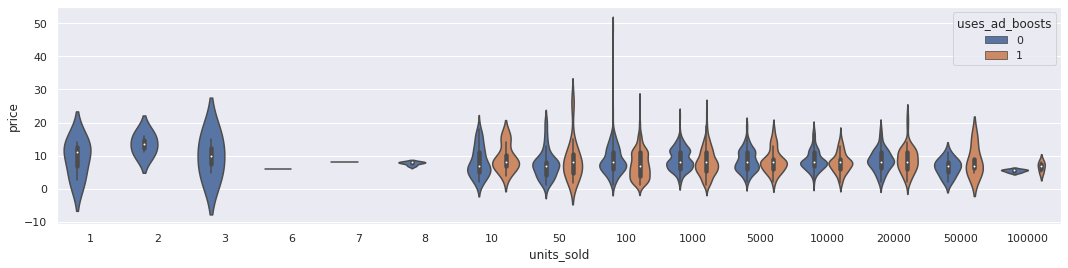

In [354]:
plt.figure(figsize=(18,4))
sns.violinplot(x=sales_df['units_sold'], y=sales_df['price'], hue=sales_df['uses_ad_boosts'])

<AxesSubplot:xlabel='retail_price', ylabel='Count'>

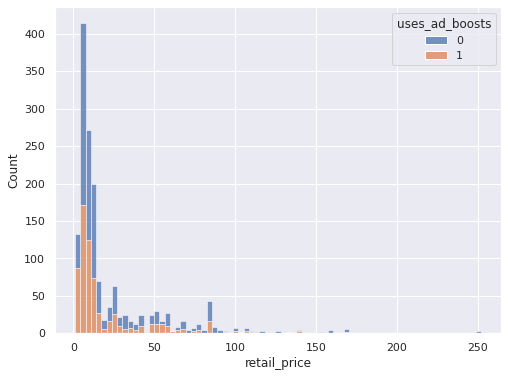

In [355]:
sns.histplot(x=sales_df['retail_price'],hue=sales_df['uses_ad_boosts'],multiple='stack')

<AxesSubplot:xlabel='units_sold', ylabel='retail_price'>

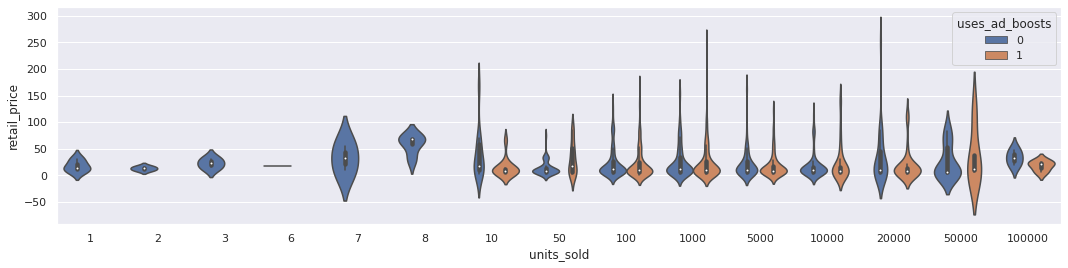

In [356]:
plt.figure(figsize=(18,4))
sns.violinplot(x=sales_df['units_sold'], y=sales_df['retail_price'], hue=sales_df['uses_ad_boosts'])

## Badge Analysis

<AxesSubplot:xlabel='badges_count', ylabel='count'>

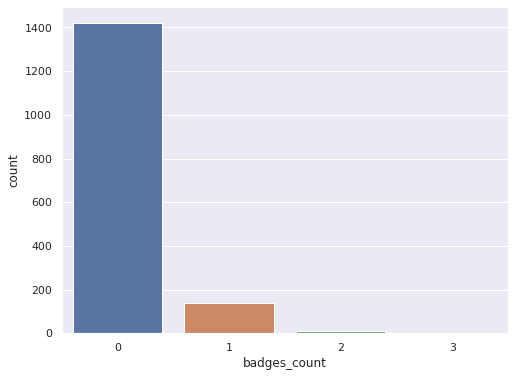

In [357]:
sns.countplot(x=sales_df['badges_count'])

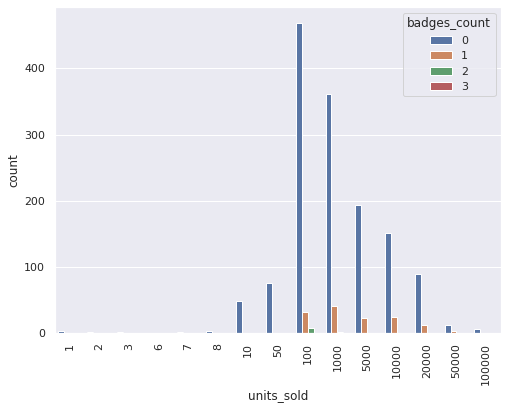

In [358]:
sns.countplot(x=sales_df['units_sold'],hue=sales_df['badges_count'])
plt.xticks(rotation=90,ha='center')
None

<AxesSubplot:xlabel='badge_local_product', ylabel='count'>

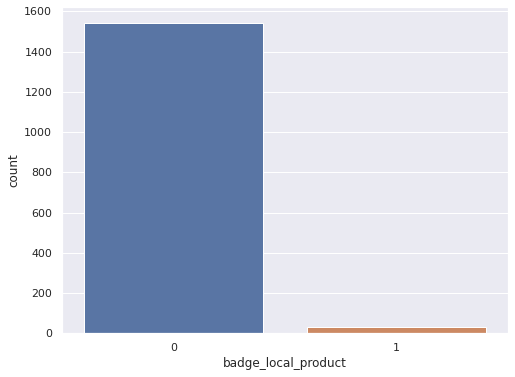

In [359]:
sns.countplot(x=sales_df['badge_local_product'])

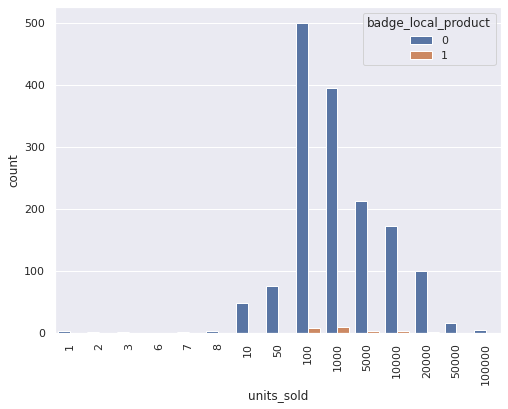

In [360]:
sns.countplot(x=sales_df['units_sold'],hue=sales_df['badge_local_product'])
plt.xticks(rotation=90,ha='center')
None

<AxesSubplot:xlabel='badge_product_quality', ylabel='count'>

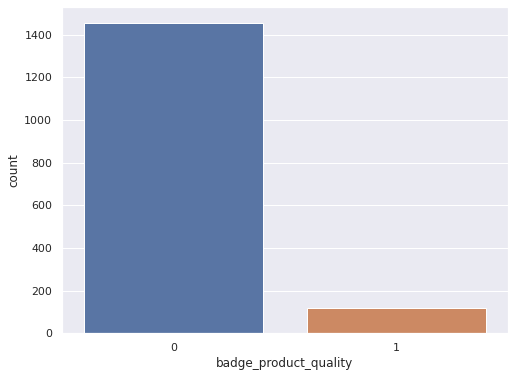

In [361]:
sns.countplot(x=sales_df['badge_product_quality'])

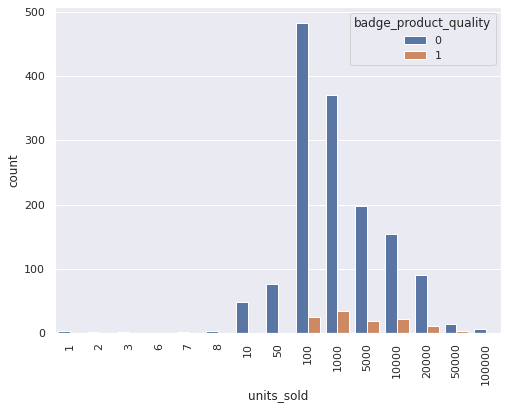

In [362]:
sns.countplot(x=sales_df['units_sold'],hue=sales_df['badge_product_quality'])
plt.xticks(rotation=90,ha='center')
None

<AxesSubplot:xlabel='badge_fast_shipping', ylabel='count'>

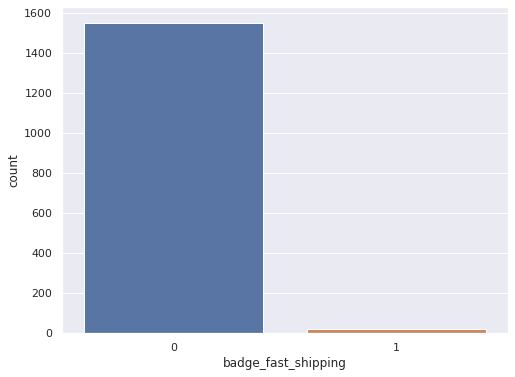

In [363]:
sns.countplot(x=sales_df['badge_fast_shipping'])

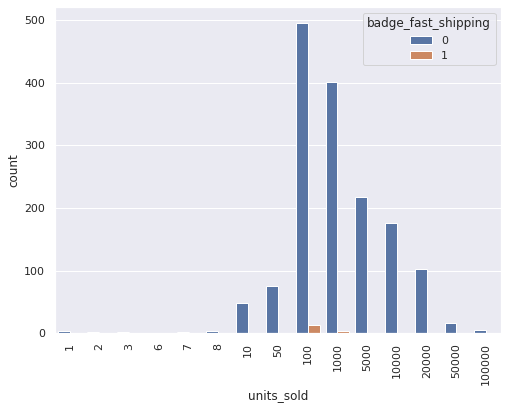

In [364]:
sns.countplot(x=sales_df['units_sold'],hue=sales_df['badge_fast_shipping'])
plt.xticks(rotation=90,ha='center')
None

## Product Variation

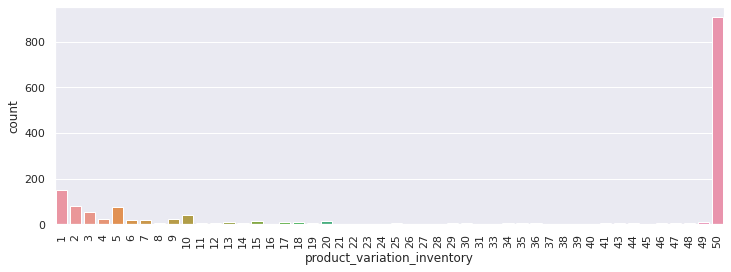

In [365]:
plt.figure(figsize=(12,4))
sns.countplot(x=sales_df['product_variation_inventory'])
plt.xticks(rotation=90, ha='center')
None


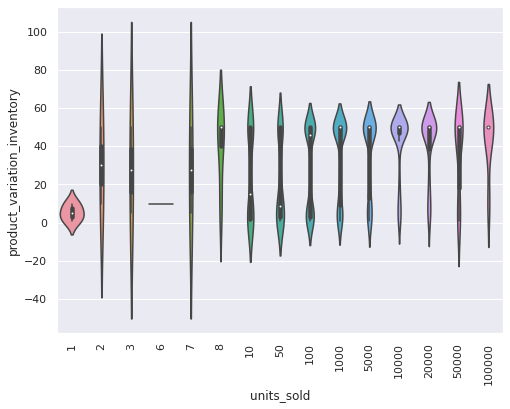

In [366]:
sns.violinplot(x=sales_df['units_sold'],y=sales_df['product_variation_inventory'])
plt.xticks(rotation=90,ha='center')
None

## Shipping Option

In [367]:
sales_df['shipping_option_name'].value_counts()

Livraison standard         1508
Standard Shipping            21
Envio Padrão                  9
Expediere Standard            6
Envío normal                  5
الشحن القياسي                 4
Standardversand               3
Standardowa wysyłka           3
Livraison Express             3
Стандартная доставка          3
Standart Gönderi              2
การส่งสินค้ามาตรฐาน           2
Spedizione standard           2
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Ekspresowa wysyłka            1
Name: shipping_option_name, dtype: int64

In [368]:
sales_df['shipping_option_name'] = sales_df[['shipping_option_name']].apply(lambda col:pd.Categorical(col).codes)
sales_df['shipping_option_name'].value_counts()

5     1508
7       21
1        9
3        6
2        5
12       4
9        3
8        3
4        3
11       3
10       2
13       2
6        2
14       1
0        1
Name: shipping_option_name, dtype: int64

<AxesSubplot:xlabel='shipping_option_name', ylabel='count'>

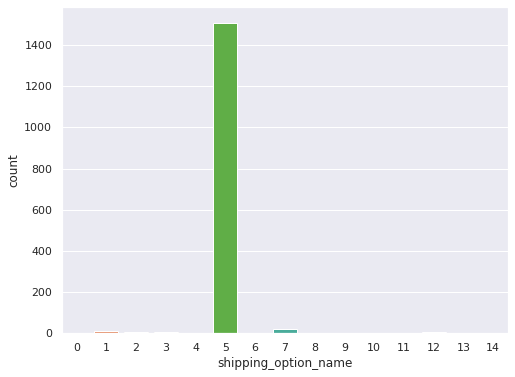

In [369]:
sns.countplot(x=sales_df['shipping_option_name'])

<AxesSubplot:xlabel='shipping_option_name', ylabel='units_sold'>

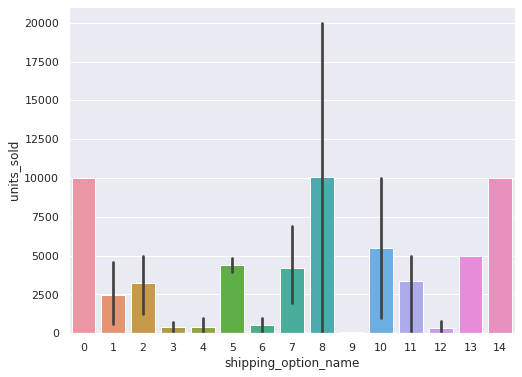

In [370]:
sns.barplot(x="shipping_option_name", y="units_sold", data=sales_df)


<AxesSubplot:xlabel='shipping_is_express', ylabel='count'>

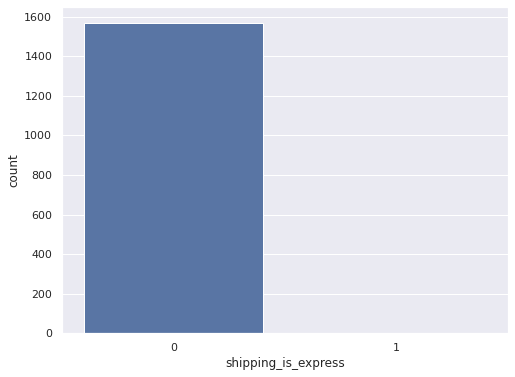

In [371]:
sns.countplot(x=sales_df['shipping_is_express'])

<AxesSubplot:xlabel='shipping_option_name', ylabel='units_sold'>

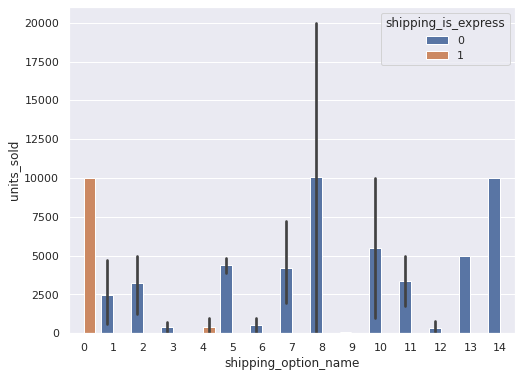

In [372]:
sns.barplot(x="shipping_option_name", y="units_sold", hue="shipping_is_express", data=sales_df)

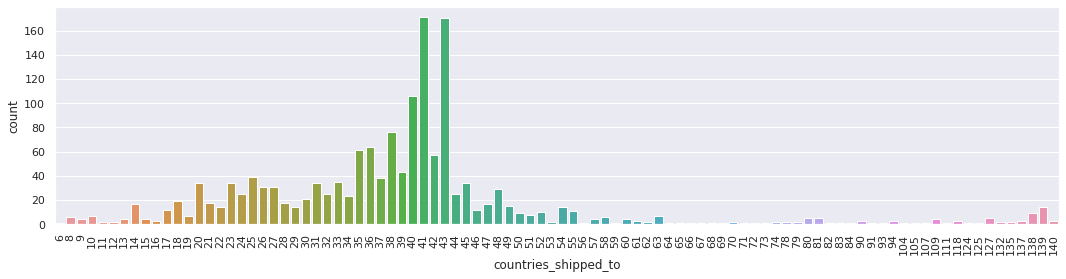

In [373]:
plt.figure(figsize=(18,4))
sns.countplot(x=sales_df['countries_shipped_to'])
plt.xticks(rotation=90, ha='center')
None

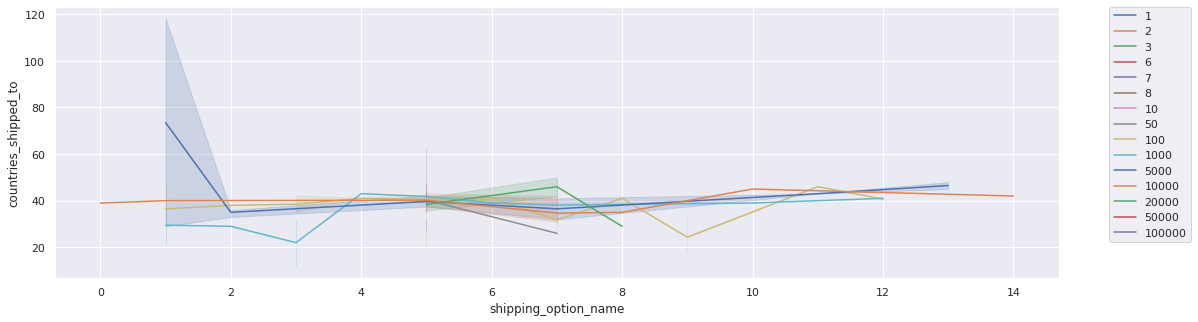

In [374]:
plt.figure(figsize=(18,5))
sns.lineplot(x='shipping_option_name',y='countries_shipped_to',hue='units_sold',palette=sns.color_palette(n_colors=len(sales_df['units_sold'].unique())).as_hex(), data=sales_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Urgency Analysis

In [375]:
sales_df['has_urgency_banner'].value_counts()

1.0    473
Name: has_urgency_banner, dtype: int64

In [376]:
sales_df.loc[sales_df['has_urgency_banner'] != 1,'has_urgency_banner'] = 0

<AxesSubplot:xlabel='has_urgency_banner', ylabel='count'>

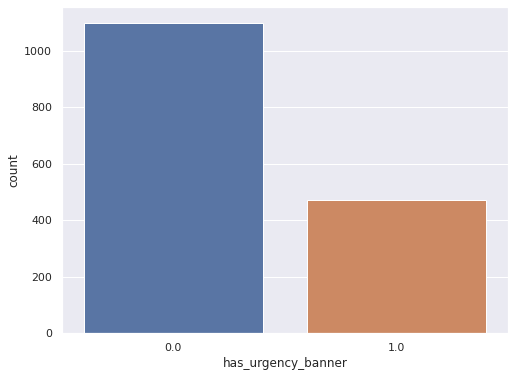

In [377]:
sns.countplot(x=sales_df['has_urgency_banner'])

<AxesSubplot:xlabel='has_urgency_banner', ylabel='units_sold'>

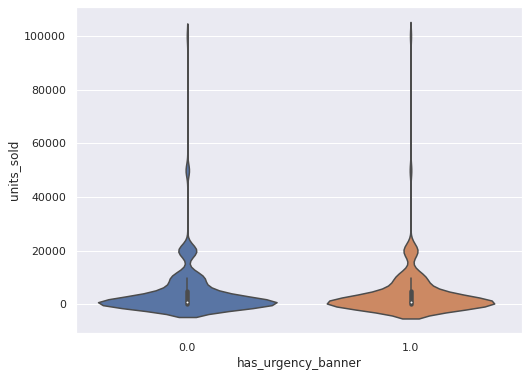

In [378]:
sns.violinplot(x=sales_df['has_urgency_banner'],y=sales_df['units_sold'])

<AxesSubplot:xlabel='urgency_text', ylabel='count'>

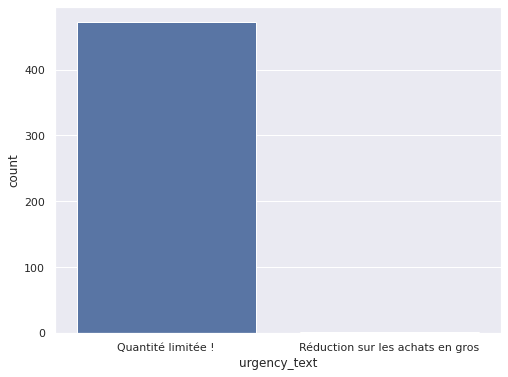

In [379]:
sns.countplot(x=sales_df['urgency_text'])

<AxesSubplot:xlabel='urgency_text', ylabel='units_sold'>

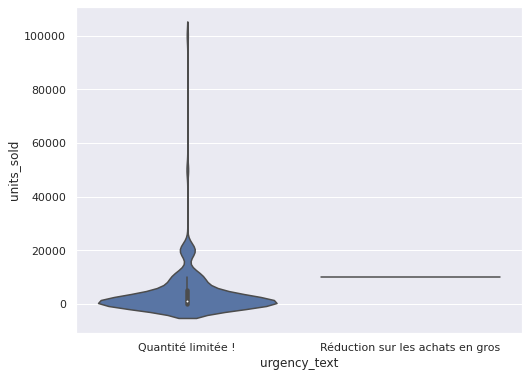

In [380]:
sns.violinplot(x=sales_df['urgency_text'],y=sales_df['units_sold'])

## Merchant Analysis

<AxesSubplot:xlabel='merchant_rating_count', ylabel='Count'>

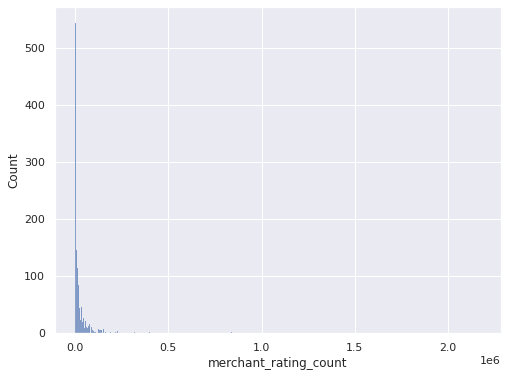

In [381]:
sns.histplot(x=sales_df['merchant_rating_count'])

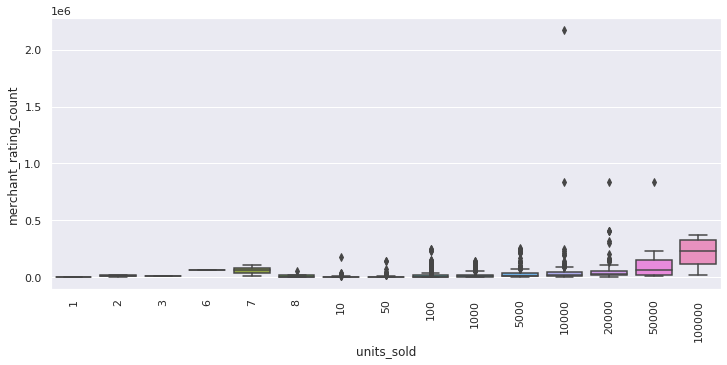

In [382]:
plt.figure(figsize=(12,5))
sns.boxplot(y=sales_df['merchant_rating_count'], x=sales_df['units_sold'])
plt.xticks(rotation=90,ha='center')
None

<AxesSubplot:xlabel='merchant_rating', ylabel='Count'>

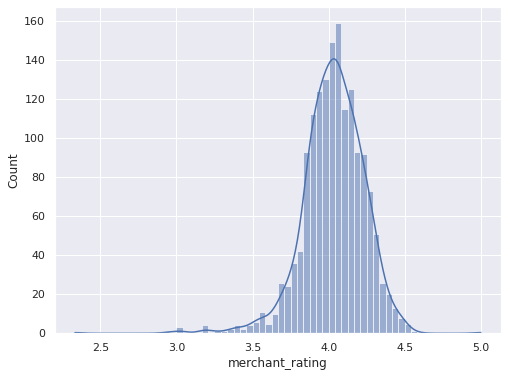

In [383]:
sns.histplot(x=sales_df['merchant_rating'],kde=True)

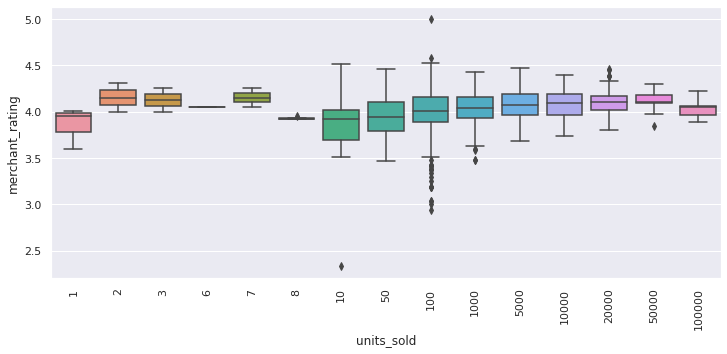

In [384]:
plt.figure(figsize=(12,5))
sns.boxplot(y=sales_df['merchant_rating'], x=sales_df['units_sold'])
plt.xticks(rotation=90,ha='center')
None

<AxesSubplot:xlabel='merchant_has_profile_picture', ylabel='count'>

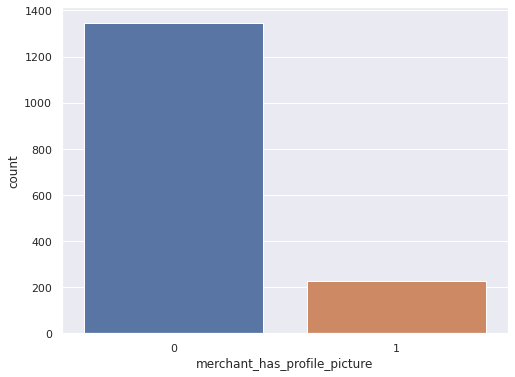

In [385]:
sns.countplot(x=sales_df['merchant_has_profile_picture'])

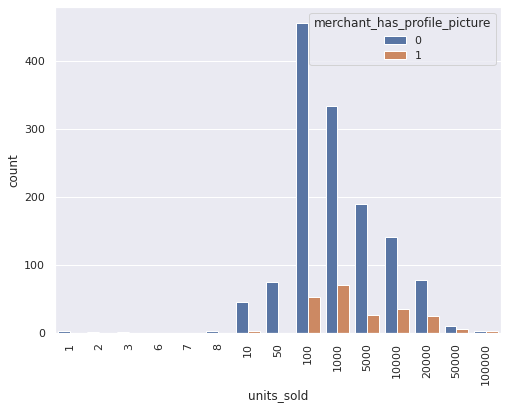

In [386]:
sns.countplot(hue=sales_df['merchant_has_profile_picture'],x=sales_df['units_sold'])
plt.xticks(rotation=90,ha='center')
None

## Tags Visualization

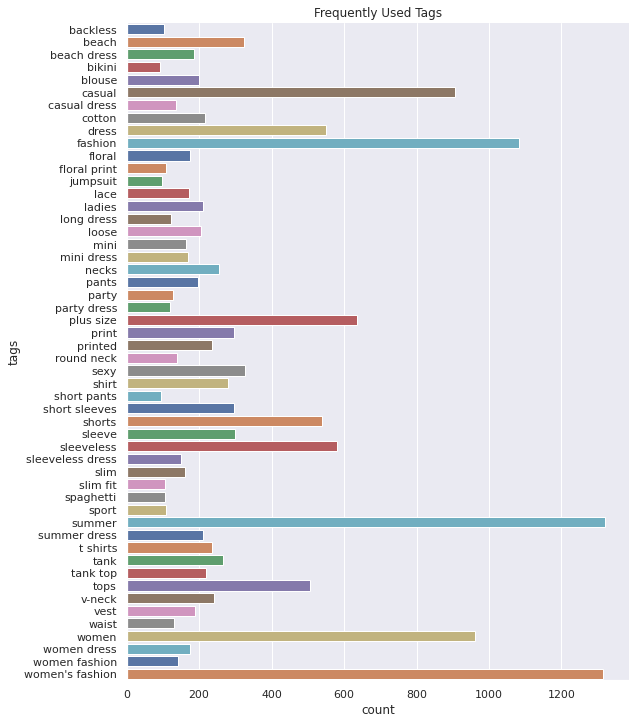

In [387]:
sales_df["tags"] = sales_df["tags"].str.lower()
tagLists = sales_df["tags"].str.split(",").tolist()

tags = []
for tagList in tagLists:
    for word in tagList:
        tags.append(word)
        
uniqueTags, count = np.unique(tags, return_counts=True)
tags_df = pd.DataFrame({"tags": uniqueTags,"count": count})
frequentTags = tags_df[tags_df["count"]>90].reset_index(drop=True)

sns.catplot(x = 'count',y = 'tags',data=frequentTags, aspect=.9, height = 10,
               kind="bar", palette = "deep").set(title = "Frequently Used Tags")

## Data Visualization

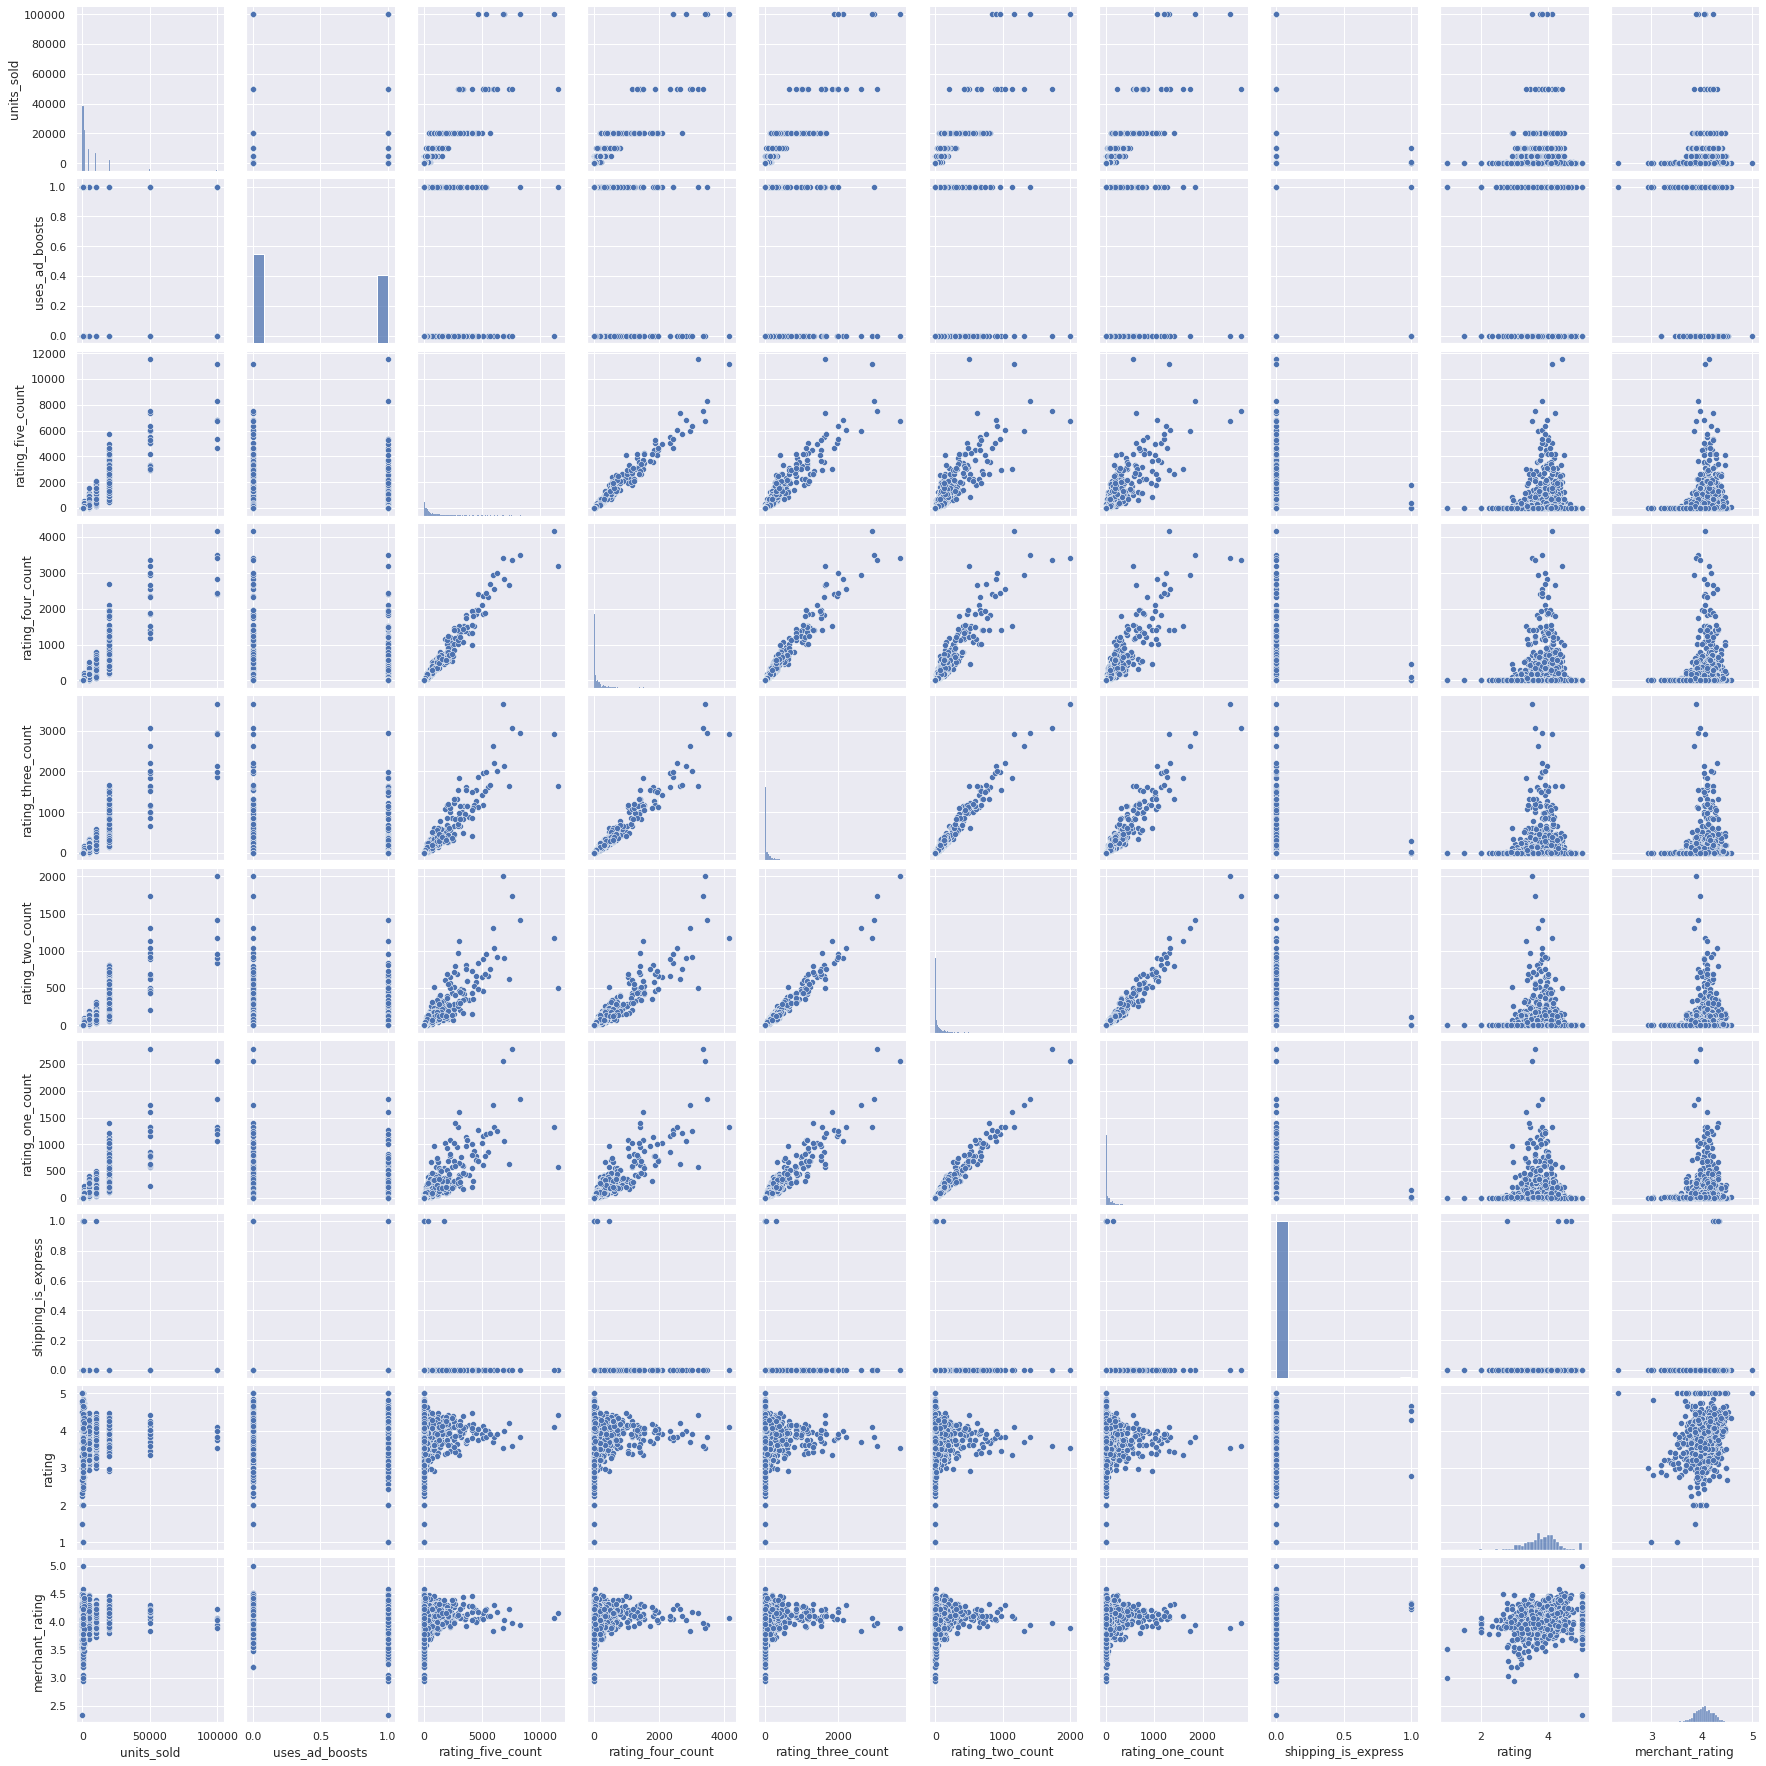

In [388]:
sns.pairplot(sales_df[["units_sold","uses_ad_boosts","rating_five_count","rating_four_count","rating_three_count","rating_two_count","rating_one_count","shipping_is_express","rating","merchant_rating"]],height=2.5)

<AxesSubplot:>

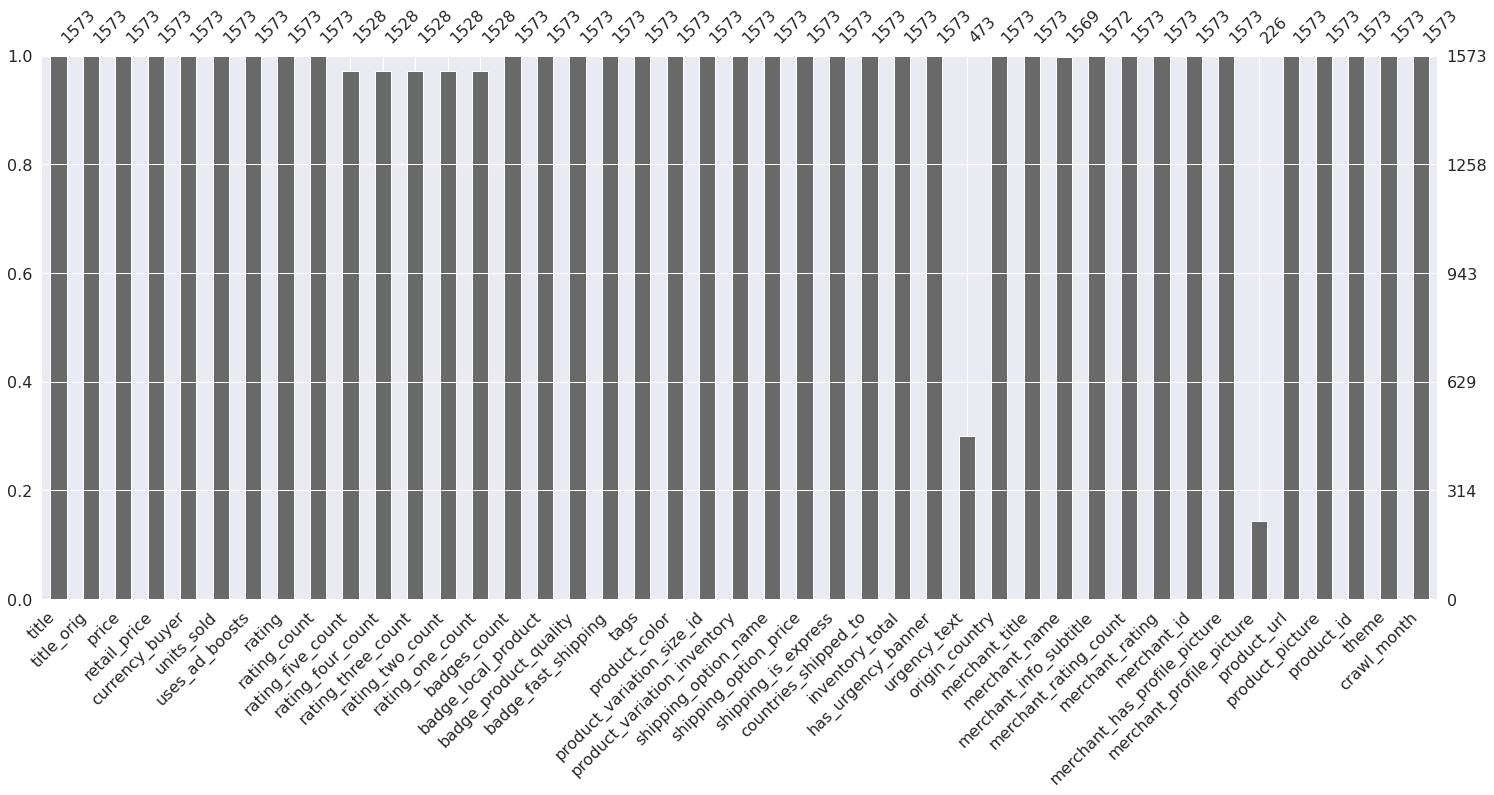

In [389]:
msno.bar(sales_df)

<AxesSubplot:>

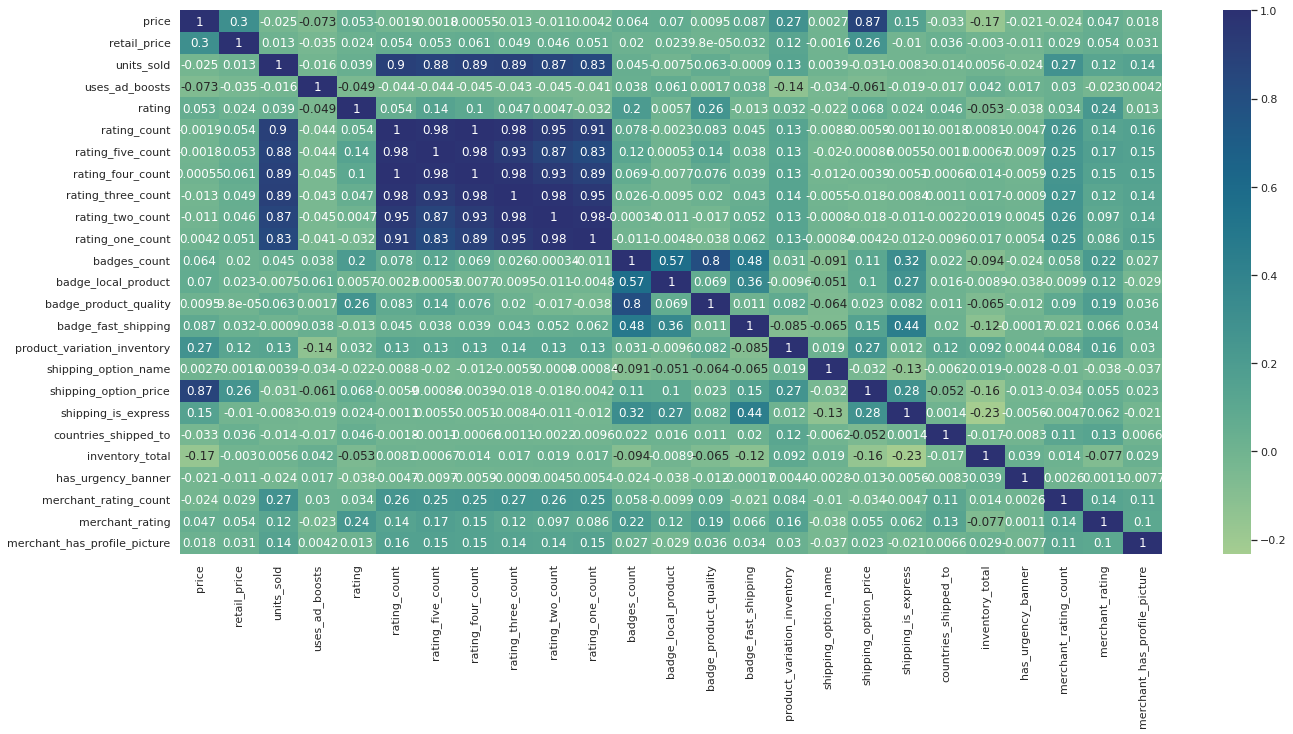

In [390]:
corr = sales_df.corr()
plt.figure(figsize=(22,10))
sns.heatmap(corr,annot=True,cmap='crest')

## Pre-Processing

In [391]:
# Ratings column as shown in Heatmaps are highly colinear with each other as expected, but since "rating" column is average of several star rating column,lets drop one star to five star column
# Columns with ids will mislead our algorithms so lets drop them
# columns have about one value dominating about 98%. Moreover have very low correlation threshold.

# unnecessary_features = [
#     'rating_five_count', 'rating_four_count','rating_three_count','rating_two_count','rating_one_count','merchant_id','product_id',
#     'title', 'title_orig', 'currency_buyer','urgency_text','merchant_title', 'merchant_info_subtitle', 'merchant_profile_picture',
#     'product_url', 'product_picture', 'theme', 'crawl_month','merchant_name'
# ]

unnecessary_features = [
    'title', 'title_orig', 'currency_buyer', 'rating_five_count', 'rating_four_count','rating_three_count','rating_two_count'
    ,'rating_one_count','badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'product_variation_inventory', 'shipping_option_name','inventory_total','merchant_name',
    'merchant_info_subtitle', 'merchant_id', 'merchant_profile_picture', 'product_url','product_picture', 'product_id', 'urgency_text',
    'theme','tags','crawl_month'
]

In [392]:
data_df = sales_df.drop(unnecessary_features, axis=1)
data_df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,product_color,product_variation_size_id,shipping_option_price,shipping_is_express,countries_shipped_to,has_urgency_banner,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,16.00,14,100,0,3.76,54,0,white,M,4,0,34,1.0,CN,zgrdejia,568,4.128521,0
1,8.00,22,20000,1,3.45,6135,0,green,XS,2,0,41,1.0,CN,SaraHouse,17752,3.899673,0
2,8.00,43,100,0,3.57,14,0,other,XS,3,0,36,1.0,CN,hxt520,295,3.989831,0
3,8.00,8,5000,1,4.03,579,0,black,M,2,0,41,0.0,CN,allenfan,23832,4.020435,0
4,2.72,3,100,1,3.10,20,0,yellow,S,1,0,35,1.0,CN,youngpeopleshop,14482,4.001588,0


In [393]:
cat_cols = ['uses_ad_boosts','product_color','product_variation_size_id','shipping_is_express','countries_shipped_to','has_urgency_banner','origin_country','merchant_title','merchant_has_profile_picture']
num_cols = []

for col in data_df.columns:
    if (not col in cat_cols) and (not col == 'units_sold'):
        num_cols.append(col)
        
num_cols

['price',
 'retail_price',
 'rating',
 'rating_count',
 'badges_count',
 'shipping_option_price',
 'merchant_rating_count',
 'merchant_rating']

In [394]:
y_data = data_df['units_sold'].copy()
y_data[data_df['units_sold'] <= 100] = '<=100'
y_data[(data_df['units_sold'] > 100) & (data_df['units_sold'] <= 5000)] = '100+_to_5000'
y_data[data_df['units_sold'] > 5000] ='5000+'

In [395]:
data_df.drop('units_sold',axis=1,inplace=True)
X_data = data_df

In [396]:
X_data.head()

,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,product_color,product_variation_size_id,shipping_option_price,shipping_is_express,countries_shipped_to,has_urgency_banner,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,16.00,14,0,3.76,54,0,white,M,4,0,34,1.0,CN,zgrdejia,568,4.128521,0
1,8.00,22,1,3.45,6135,0,green,XS,2,0,41,1.0,CN,SaraHouse,17752,3.899673,0
2,8.00,43,0,3.57,14,0,other,XS,3,0,36,1.0,CN,hxt520,295,3.989831,0
3,8.00,8,1,4.03,579,0,black,M,2,0,41,0.0,CN,allenfan,23832,4.020435,0
4,2.72,3,1,3.10,20,0,yellow,S,1,0,35,1.0,CN,youngpeopleshop,14482,4.001588,0


In [397]:
y_data.unique()

array(['<=100', '5000+', '100+_to_5000'], dtype=object)

In [398]:

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler, StandardScaler


ct = ColumnTransformer([
    ('num',make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),StandardScaler()),num_cols),
    ('cat',make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore')),cat_cols)
])

In [399]:
### Your code here
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X_data,y_data, test_size = 0.15,stratify=y_data, random_state=0)

## Modelling

In [425]:

from sklearn.metrics import accuracy_score,balanced_accuracy_score,f1_score,roc_auc_score,average_precision_score, confusion_matrix, classification_report
pred_data = {}

def model_stats(y, y_hat):
    acc = accuracy_score(y,y_hat)
    bacc = balanced_accuracy_score(y,y_hat)
    f1 = f1_score(y,y_hat, average='micro')
    
    print('Accuracy Score', acc)
    print('Balanced Accuracy', bacc)
    print('F1 Score', f1)
    
    clas_report = classification_report(y,y_hat)
    cnf_mat = confusion_matrix(y,y_hat)
    
    print(clas_report)
    
    return {'Acc':acc, 'Bal_Acc':bacc, 'f1':f1}

### KNN

In [401]:
### Your code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', knn)
])
knn_pipe.fit(X_train,y_train)
knn_pipe.score(X_test,y_test)


0.6101694915254238

In [402]:
### Your code here
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_neighbors': [5,10,15,20,30],
    'model__weights': ['uniform','distance']
}

knn_grid = GridSearchCV(knn_pipe,param_grid)
knn_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['price',
                                                                          'retail_price',
                                                                          'rating',
                                                                          'rating_count',
                                                                          'badges_count',
                                                                          'shipping_option_price',
                                                                          'merchant_rating_count',
                                                                          'merchant_rating']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Simpl...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['uses_ad_boosts',
                                                                          'product_color',
                                                                          'product_variation_size_id',
                                                                          'shipping_is_express',
                                                                          'countries_shipped_to',
                                                                          'has_urgency_banner',
                                                                          'origin_country',
                                                                          'merchant_title',
                                                                          'merchant_has_profile_picture'])])),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 30],
                         'model__weights': ['uniform', 'distance']})

In [436]:
print(knn_grid.best_params_)
best_knn_pipe = knn_grid.best_estimator_
pred_data['knn'] = model_stats(y_test,best_knn_pipe.predict(X_test))


{'model__n_neighbors': 10, 'model__weights': 'distance'}
Accuracy Score 0.614406779661017
Balanced Accuracy 0.5991800131416389
F1 Score 0.614406779661017
              precision    recall  f1-score   support

100+_to_5000       0.52      0.69      0.60        93
       5000+       0.89      0.52      0.66        46
       <=100       0.66      0.59      0.62        97

    accuracy                           0.61       236
   macro avg       0.69      0.60      0.62       236
weighted avg       0.65      0.61      0.62       236



### Decision Tree

In [404]:
### Your code here
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', dtc)
])
dtc_pipe.fit(X_train,y_train)
dtc_pipe.score(X_test,y_test)

0.8728813559322034

In [405]:
param_grid = {
    'model__criterion': ['gini','entropy'],
    'model__splitter': ['best','random'],
}

dtc_grid = GridSearchCV(dtc_pipe,param_grid)
dtc_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['price',
                                                                          'retail_price',
                                                                          'rating',
                                                                          'rating_count',
                                                                          'badges_count',
                                                                          'shipping_option_price',
                                                                          'merchant_rating_count',
                                                                          'merchant_rating']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Simpl...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['uses_ad_boosts',
                                                                          'product_color',
                                                                          'product_variation_size_id',
                                                                          'shipping_is_express',
                                                                          'countries_shipped_to',
                                                                          'has_urgency_banner',
                                                                          'origin_country',
                                                                          'merchant_title',
                                                                          'merchant_has_profile_picture'])])),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__splitter': ['best', 'random']})

In [435]:
### Your code here
print(dtc_grid.best_params_)
best_dtc_pipe = dtc_grid.best_estimator_
pred_data['DTC'] = model_stats(y_test,best_dtc_pipe.predict(X_test))

{'model__criterion': 'gini', 'model__splitter': 'best'}
Accuracy Score 0.864406779661017
Balanced Accuracy 0.850161218027501
F1 Score 0.864406779661017
              precision    recall  f1-score   support

100+_to_5000       0.80      0.87      0.84        93
       5000+       0.88      0.78      0.83        46
       <=100       0.93      0.90      0.91        97

    accuracy                           0.86       236
   macro avg       0.87      0.85      0.86       236
weighted avg       0.87      0.86      0.86       236



### Random Forest

In [407]:
### Your code here
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', rfc)
])
rfc_pipe.fit(X_train,y_train)
rfc_pipe.score(X_test,y_test)

0.8432203389830508

In [432]:
param_grid = {
    'model__criterion': ['gini','entropy'],
    'model__max_features': ['sqrt','log2']
}

rfc_grid = GridSearchCV(rfc_pipe,param_grid)
rfc_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['price',
                                                                          'retail_price',
                                                                          'rating',
                                                                          'rating_count',
                                                                          'badges_count',
                                                                          'shipping_option_price',
                                                                          'merchant_rating_count',
                                                                          'merchant_rating']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Simpl...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['uses_ad_boosts',
                                                                          'product_color',
                                                                          'product_variation_size_id',
                                                                          'shipping_is_express',
                                                                          'countries_shipped_to',
                                                                          'has_urgency_banner',
                                                                          'origin_country',
                                                                          'merchant_title',
                                                                          'merchant_has_profile_picture'])])),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_features': ['sqrt', 'log2']})

In [433]:
### Your code here
print(rfc_grid.best_params_)
best_rfc_pipe = rfc_grid.best_estimator_
pred_data['RFC'] = model_stats(y_test,best_rfc_pipe.predict(X_test))

{'model__criterion': 'gini', 'model__max_features': 'sqrt'}
Accuracy Score 0.8389830508474576
Balanced Accuracy 0.7989152524945821
F1 Score 0.8389830508474576
              precision    recall  f1-score   support

100+_to_5000       0.76      0.86      0.81        93
       5000+       0.88      0.61      0.72        46
       <=100       0.91      0.93      0.92        97

    accuracy                           0.84       236
   macro avg       0.85      0.80      0.81       236
weighted avg       0.84      0.84      0.84       236



### Gradient Boosting Classifier

In [420]:
from sklearn.ensemble import GradientBoostingClassifier

gbs = GradientBoostingClassifier()
gbs_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', gbs)
])
gbs_pipe.fit(X_train,y_train)
gbs_pipe.score(X_test,y_test)

0.8771186440677966

In [421]:
param_grid = {
    'model__n_estimators': [90,100,110,120,130],
    'model__max_depth': [1,3,5,7]
}

gbs_grid = GridSearchCV(gbs_pipe,param_grid)
gbs_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['price',
                                                                          'retail_price',
                                                                          'rating',
                                                                          'rating_count',
                                                                          'badges_count',
                                                                          'shipping_option_price',
                                                                          'merchant_rating_count',
                                                                          'merchant_rating']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Simpl...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['uses_ad_boosts',
                                                                          'product_color',
                                                                          'product_variation_size_id',
                                                                          'shipping_is_express',
                                                                          'countries_shipped_to',
                                                                          'has_urgency_banner',
                                                                          'origin_country',
                                                                          'merchant_title',
                                                                          'merchant_has_profile_picture'])])),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__max_depth': [1, 3, 5, 7],
                         'model__n_estimators': [90, 100, 110, 120, 130]})

In [430]:
### Your code here
print(gbs_grid.best_params_)
best_gbs_pipe = gbs_grid.best_estimator_
pred_data['GBS'] = model_stats(y_test,best_gbs_pipe.predict(X_test))

{'model__max_depth': 7, 'model__n_estimators': 120}
Accuracy Score 0.885593220338983
Balanced Accuracy 0.8749632500012049
F1 Score 0.885593220338983
              precision    recall  f1-score   support

100+_to_5000       0.84      0.87      0.86        93
       5000+       0.88      0.83      0.85        46
       <=100       0.93      0.93      0.93        97

    accuracy                           0.89       236
   macro avg       0.89      0.87      0.88       236
weighted avg       0.89      0.89      0.89       236



### AdaBoost Classifier

In [423]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', abc)
])
abc_pipe.fit(X_train,y_train)
abc_pipe.score(X_test,y_test)

0.635593220338983

In [426]:
param_grid = {
    'model__n_estimators': [3,5,7,9,11,15],
    'model__learning_rate': [0.01,0.1],
    'model__algorithm': ['SAMME','SAMME.R']
}

abc_grid = GridSearchCV(abc_pipe,param_grid)
abc_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['price',
                                                                          'retail_price',
                                                                          'rating',
                                                                          'rating_count',
                                                                          'badges_count',
                                                                          'shipping_option_price',
                                                                          'merchant_rating_count',
                                                                          'merchant_rating']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Simpl...
                                                                         ['uses_ad_boosts',
                                                                          'product_color',
                                                                          'product_variation_size_id',
                                                                          'shipping_is_express',
                                                                          'countries_shipped_to',
                                                                          'has_urgency_banner',
                                                                          'origin_country',
                                                                          'merchant_title',
                                                                          'merchant_has_profile_picture'])])),
                                       ('model', AdaBoostClassifier())]),
             param_grid={'model__algorithm': ['SAMME', 'SAMME.R'],
                         'model__learning_rate': [0.01, 0.1],
                         'model__n_estimators': [3, 5, 7, 9, 11, 15]})

In [429]:
### Your code here
print(abc_grid.best_params_)
best_abc_pipe = abc_grid.best_estimator_
pred_data['ABC'] = model_stats(y_test,best_abc_pipe.predict(X_test))

{'model__algorithm': 'SAMME.R', 'model__learning_rate': 0.01, 'model__n_estimators': 15}
Accuracy Score 0.864406779661017
Balanced Accuracy 0.8568942997739573
F1 Score 0.864406779661017
              precision    recall  f1-score   support

100+_to_5000       0.84      0.81      0.82        93
       5000+       0.86      0.83      0.84        46
       <=100       0.88      0.94      0.91        97

    accuracy                           0.86       236
   macro avg       0.86      0.86      0.86       236
weighted avg       0.86      0.86      0.86       236



## Model Result Visualization

In [434]:
pred_data

{'ABC': {'Acc': 0.864406779661017,
  'Bal_Acc': 0.8568942997739573,
  'f1': 0.864406779661017},
 'GBS': {'Acc': 0.885593220338983,
  'Bal_Acc': 0.8749632500012049,
  'f1': 0.885593220338983},
 'RFC': {'Acc': 0.8389830508474576,
  'Bal_Acc': 0.7989152524945821,
  'f1': 0.8389830508474576}}

<AxesSubplot:xlabel='model', ylabel='score'>

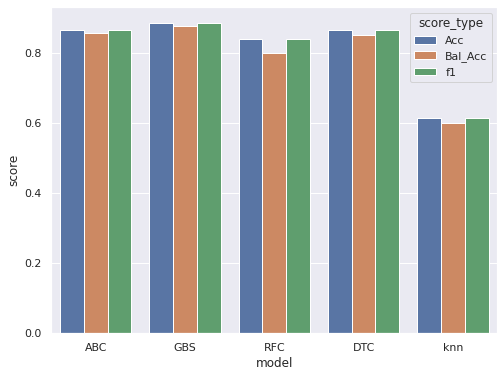

In [437]:
pred_df = pd.DataFrame(columns=['model','score_type','score'])
for mk,mv in pred_data.items():
    for sk,sv in pred_data[mk].items():
        pred_df.loc[len(pred_df)] = [mk,sk,sv]
        
sns.barplot(data=pred_df, x='model', y='score', hue='score_type')


From graph it is clear that Gradient Boosting Classifier is the best performing classifier on this dataset

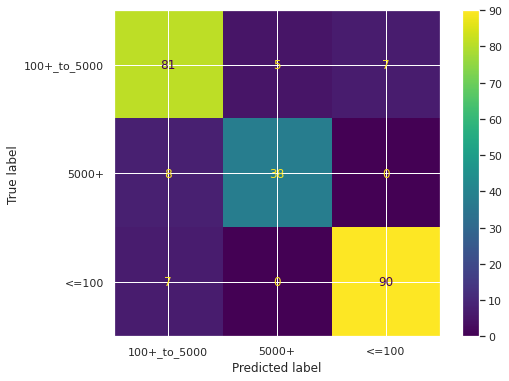

In [438]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_gbs_pipe,X_test,y_test)

## Saving the best model

In [442]:
import pickle
with open('clf.pkl','wb') as fp:
    pickle.dump(best_gbs_pipe,fp)

In [2]:
import joblib

In [3]:
model = joblib.load('clf.pkl')

In [ ]:
model.predict()